# Elliptical harmonic oscillator with interacting gaussians

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tqdm

from vmc.interface import PyEllipticalHarmonicOscillator, PyMetropolisAlgorithm, \
    PyInteractingEllipticalGaussian, PySampler
from vmc import run_experiment

from IPython.core.pylabtools import figsize
from IPython.core.display import display

In [2]:
sns.set(color_codes=True)

In [3]:
mass = 1.0
omega = 1.0
hbar = 1.0

radius = 0.043
beta = _lambda = 2.82843
#beta = _lambda = 1

num_particles = 3
num_dimensions = 3

step_length = 1.0
num_thermalization_steps = 0
num_samples = int(1e6)
num_local_energies = 0

alpha_min = 0.2
alpha_max = 1.0
num_alphas = 30

parameter_names = ["alpha"]

alphas = np.linspace(alpha_min, alpha_max, num_alphas).reshape(num_alphas, 1)

kwargs = {
    "num_samples": num_samples, "step_length": step_length,
    "num_thermalization_steps": num_thermalization_steps}

In [4]:
wavefunction = PyInteractingEllipticalGaussian(
    num_particles, num_dimensions, mass, omega, beta, radius, spread=step_length)
solver = PyMetropolisAlgorithm(num_particles)
hamiltonian = PyEllipticalHarmonicOscillator(_lambda)

sampler = PySampler(wavefunction, hamiltonian, solver, num_local_energies)

In [5]:
df = run_experiment(sampler, wavefunction, alphas, parameter_names, **kwargs)

100%|██████████| 30/30 [00:14<00:00,  2.05it/s]


In [6]:
display(df)

,alpha,energy,variance,acceptance
0,0.200000,13.391045,3.617277e+06,0.597810
1,0.227586,-30550.158955,-2.255797e-02,0.000000
2,0.255172,9.341777,3.197241e+04,0.553315
3,0.282759,8.617961,5.474935e+00,0.533309
4,0.310345,8.228832,3.665132e+00,0.515613
5,0.337931,7.956139,2.422008e+00,0.498666
6,0.365517,7.763941,1.532909e+00,0.482459
7,0.393103,7.674749,1.768358e+03,0.466867
8,0.420690,7.507033,7.427569e+01,0.453066
9,0.448276,7.448244,1.954553e-01,0.440205


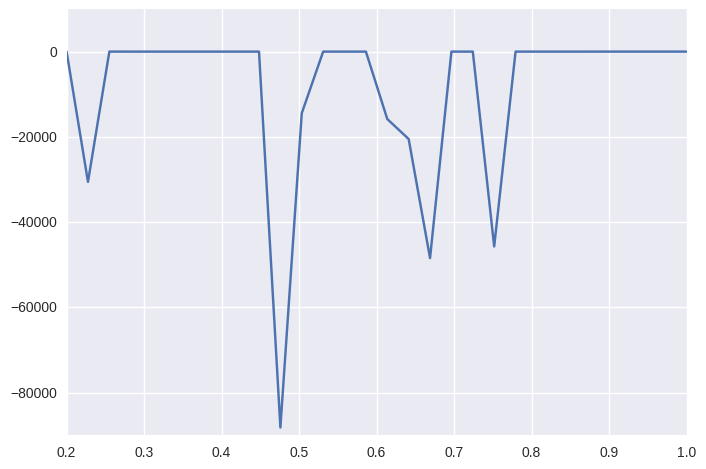

In [7]:
plt.plot(df["alpha"], df["energy"])
plt.show()

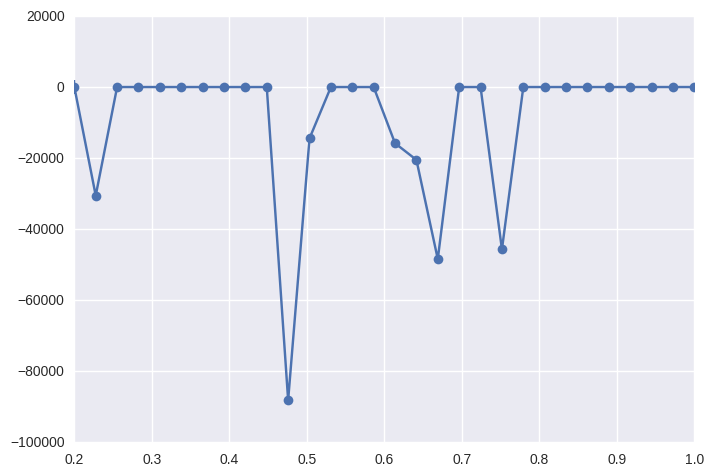

In [8]:
plt.errorbar(
    df["alpha"], df["energy"],
    yerr=np.sqrt(df["variance"]),
    label="analytical", fmt="o-")
plt.show()